In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Chargement des bases créées par Axel et Rémi
df_reponses = pd.read_csv("../data/df_reponses.csv")
df_text = pd.read_csv("../data/dummies_text.csv")

In [3]:
df_text.set_index('txt_node_id', inplace = True) #on met la colonne txt_node_id en index pour éviter problème pour la suite
df_reponses.set_index('node_id', inplace = True) #on met la colonne node_id en index pour éviter problème pour la suite

In [4]:
reponses=df_reponses.columns
textes=df_text.columns

##  Suppression des clients tests et séparation en 2 (textes que l'on utilise dans un premier temps, et texte que l'on utilise pas) 

In [1]:
liste_client_test=['d37394c52f494d90012f4dfc428d2551',
 '2c90f58852ae079f0152c579a76c639a',
 'd37394c527d4958801281b4ce9990aea',
 'ff8081817113806401714042579716a2',
 '2c90f588532eaccc015341b7c7317585',
 '2c90f58945d35f02014666295f0d5d86',
 'd3739445325c4b570132724fdc89792d',
 'd37394c52dba36fd012de72110da38be',
 '4028807d16245e4d0116249a641c04c2',
 'd37394c52dba36fd012dec61f2df4236',
 '2c90f5885cd183d0015cd53775170f50',
 'd37394d91b9ec55d011ba1c925a00789',
 'd37394d91b9ec55d011ba1c65210073c',
 '2c90f58858fa0bcc0158fd01690a16bf',
 'd37394453bb51e7d013bbdcdded81e57',
 '2c90f5894b136662014b4b02126c5fcb',
 'ff8081816b653c05016b74fc6e507e0f',
 '2c90f58957195ef901572414ded843f7',
 '4028807d16245e4d01162478de7600ab',
 'd373944538859c340138940b6e26682c']

In [6]:
#suppression des clients tests
df_reponses = df_reponses[~df_reponses.index.isin(liste_client_test)]
df_text = df_text[~df_text.index.isin(liste_client_test)]

In [7]:
#On sépare en 2 les textes, une liste 'oui' qui regroupent les textes qui sont au moins chez plus de 10% des clients et "non"
#le reste
df_text=df_text[df_text.index.isin(df_reponses.index)]
compte=pd.DataFrame(df_text.sum(axis=0)).iloc[0:,:].sort_values(by=[0])
compte.columns=['nombre']
liste_texte_non=list(compte.loc[compte['nombre']<40].index)
liste_texte_oui=list(compte.loc[compte['nombre']>=40].index)

In [8]:
df_text_oui = df_text.drop(columns=liste_texte_non)
df_text_non = df_text.drop(columns=liste_texte_oui)

In [9]:
df_oui = df_reponses.join(df_text_oui)
df_non = df_reponses.join(df_text_non)

# Création des matrices de corrélation

### Entre les questions

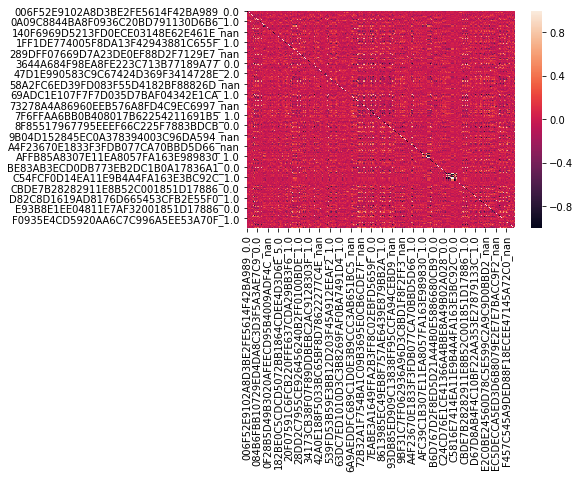

In [10]:
corr_reponses = df_reponses.corr()
sns.heatmap(corr_reponses)

In [11]:
#fonction qui compte le nombre de coeff supérieur à un seuil dans  la matrice
def comptage_corr_rep(x):
    compteur=0
    for i in range(775):
        for j in range(775):
            if corr_reponses.iloc[i,j]>= x:
                compteur=compteur+1
    return compteur
cr1=comptage_corr_rep(0.1)
cr5=comptage_corr_rep(0.5)
cr75=comptage_corr_rep(0.75)
cr9=comptage_corr_rep(0.9)
print(cr1,cr5,cr75,cr9)

KeyboardInterrupt: 

In [ ]:
corr_text = df_text.corr()
sns.heatmap(corr_text)

### La matrice de corrélation qui nous intéresse (entre questions et texte)

In [10]:
corr_oui = df_oui.corr()
corr_non = df_non.corr()

In [11]:
corr_oui.drop(reponses,inplace=True) #On supprime en ligne (ou colonne jsais plus) les indicatrices réponses
corr_non.drop(reponses,inplace=True)

In [12]:
corr_oui.drop(liste_texte_oui,axis=1,inplace=True)
corr_non.drop(liste_texte_non,axis=1,inplace=True)

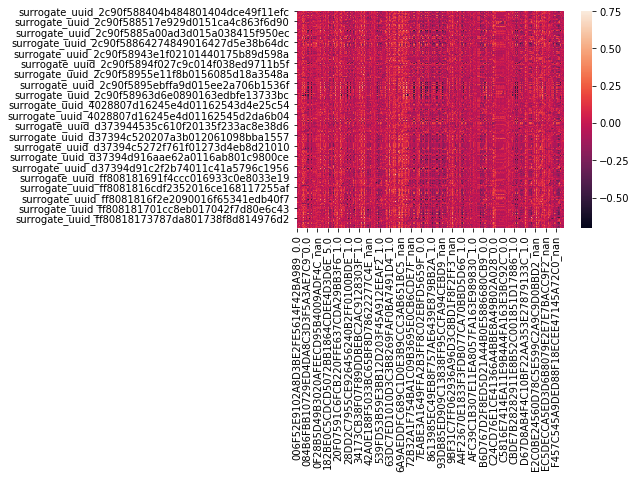

In [13]:
sns.heatmap(corr_oui)

In [ ]:
corr_oui.shape #cohérent

In [ ]:
corr_non.shape

# Etude plus profonde sur la relation entre réponses et textes

In [ ]:
#Définition d'une fonction qui compte le nombre de coeff qui est supérieur à un certain seuil
def comptage(x):
    compteur=0
    for i in range(775):
        for j in range(3199):
            if np.abs(corr.iloc[i,j])>= x:
                compteur=compteur+1
    return compteur
c1=comptage(0.1)
c5=comptage(0.5)
c6=comptage(0.6)
c65=comptage(0.65)
c7=comptage(0.7)
c8=comptage(0.8)

In [ ]:
print(c1,c5,c6,c65,c7,c8)

#### On crée des fonctions, qui pour un coeff de corr donné x et un nombre donné n, vont renvoyer la liste des textes ou reponses qui ont plus de n reponses ou textes dont le coeff de corr est sup à x

In [ ]:
def creation_list_rep(x,n):
    rep_forte = []
    for i in range(775):
        compteur=0
        for j in range(3199):
            if np.abs(corr.iloc[i,j])>=x:
                compteur=compteur+1
        if compteur >= n :
            rep_forte.append(corr.index[i])
    return rep_forte

In [ ]:
def creation_list_txt(x,n):
    txt_fort = []
    for i in range(3199):
        compteur=0
        for j in range(775):
            if np.abs(corrT.iloc[i,j])>=x:
                compteur=compteur+1
        if compteur >= n :
            txt_fort.append(corrT.index[i])
    return txt_fort

In [ ]:
ct5_100=creation_list_txt(0.5,100)
ct3_100=creation_list_txt(0.3,100)
ct15_150=creation_list_txt(0.15,150)
ct1_300=creation_list_txt(0.1,300)
ct1_150=creation_list_txt(0.1,150)
ct1_100=creation_list_txt(0.1,100)
print(len(ct5_100),len(ct3_100),len(ct15_150),len(ct1_300),len(ct1_150),len(ct1_100))

In [ ]:
cr5_100=creation_list_rep(0.5,100)
cr3_100=creation_list_rep(0.3,100)
cr1_1000=creation_list_rep(0.1,1000)
cr1_700=creation_list_rep(0.1,700)
cr1_500=creation_list_rep(0.1,500)
cr1_100=creation_list_rep(0.1,100)
print(len(cr5_100),len(cr3_100),len(cr1_1000),len(cr1_700),len(cr1_500),len(cr1_100))

In [ ]:
#On regarde quelle est la proportion de rep oui, non ou non réponses dans la liste cr1_1000
print(len([col for col in cr1_1000 if '_nan' in col]),len([col for col in cr1_1000 if '_1.0' in col]),len([col for col in cr1_1000 if '_0.0' in col]))

In [ ]:
CorrR1_1000 = corr.loc[corr.index.isin(cr1_1000)]

In [ ]:
sns.heatmap(CorrR1_1000)

In [ ]:
CorrR1_1000.shape

In [ ]:
#On vérifie si les listes avec un taux plus élevé sont contenues dans cr1_100
print(sum(CorrR1_1000.index.isin(cr5_100)),sum(CorrR1_1000.index.isin(cr3_100)))

In [ ]:
CorrR1_1000.loc['060AD92489947D410D897474079C1477_0.0']

## Réalisation d'un graphe 

In [14]:
maxs_oui=corr_oui.max(axis=1) #Pour chaque texte, on regarde le coefficient max avec les qts
maxs_non=corr_non.max(axis=1)

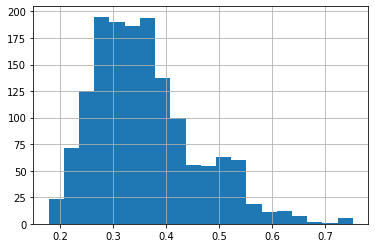

In [15]:
maxs_oui.hist(bins=20) #repartition

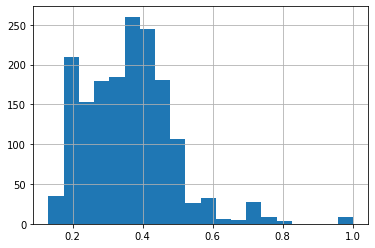

In [16]:
maxs_non.hist(bins=20) #repartition